# Laboratorio 8

1. Use the following snippet of code to create you initial dataset.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable

In [2]:
def f1(x): return x*np.sin(x) + 2*x
def f2(x): return 10*np.sin(x) + np.power(x,2)
def f3(x): return np.sign(x)*(np.power(x,2)+300) + 20*np.sin(x)

In [3]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)

2. Draw and inspect the shape of the function

<AxesSubplot:>

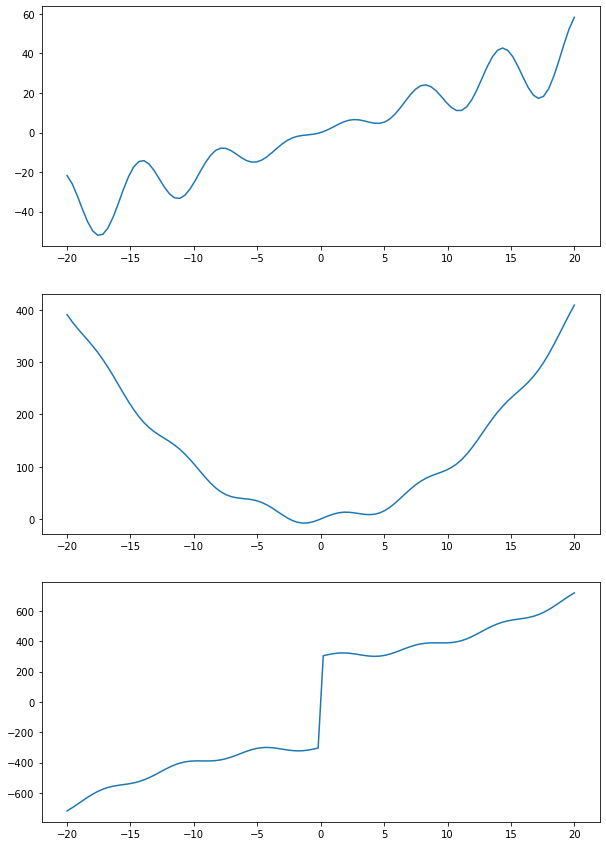

In [4]:
fig, axs = plt.subplots(3,1,figsize=(10,15))
sns.lineplot(x=X,y=f1(X),ax=axs[0])
sns.lineplot(x=X,y=f2(X),ax=axs[1])
sns.lineplot(x=X,y=f3(X),ax=axs[2])

3. Frame now a regression task to your generated data. Start from the ordinary least squares Linear Regression.

In [5]:
from sklearn.model_selection import train_test_split

def generate_train_test(x, f, train_size=0.3, random_state = None):
    y = f(x)
    X_train, X_test, y_train, y_test = train_test_split(
        x,
        y,
        train_size=train_size,
        random_state=random_state,
        shuffle=True
    )
    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return X_train, X_test, y_train, y_test

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(x, f, model, train_size = 0.3, random_state = None):
    X_train, X_test, y_train, y_test = generate_train_test(x, f, train_size=train_size, random_state=random_state)

    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    y_train = y_train.ravel()
    y_test = y_test.ravel() 

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # data_train = pd.DataFrame(np.concatenate((X_train,y_train),axis=1), columns=['X_train','y_train'])
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x,f(x),label='ground truth',color='lightseagreen')
    ax.scatter(X_train,y_train,label='train points',color='navy')
    ax.plot(X_test,y_pred,color='tomato')

    return mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)

(66.53043917136719, 0.8875006551861293)

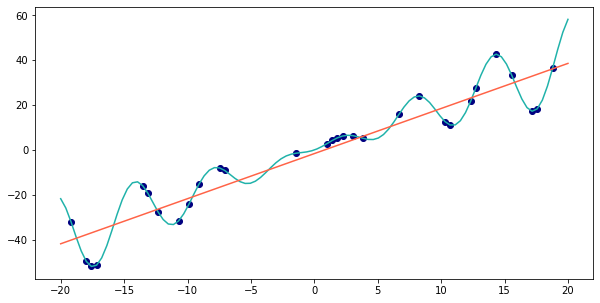

In [7]:
# evaluate_model(X, f1, LinearRegression(n_jobs=-2))
evaluate_model(X, f1, Ridge())
# evaluate_model(X, f1, SVR())
# evaluate_model(X, f1, RandomForestRegressor(n_estimators=1000))
# evaluate_model(X, f1, make_pipeline())
# evaluate_model(X, f1, MLPRegressor(hidden_layer_sizes=(100,100), random_state=42))

+-----------------------------+--------------------+---------------------+
|            model            |        MSE         |          R2         |
+-----------------------------+--------------------+---------------------+
|       LinearRegression      | 77.47218993806494  |  0.8773472280698357 |
|            Ridge            | 77.50073828878843  |  0.8773020307628656 |
|             SVR             | 327.2211651250417  | 0.48194851637871683 |
|    RandomForestRegressor    | 59.963305825234954 |  0.905067022380019  |
|         MLPRegressor        | 82.32779391445182  |  0.8696599110135462 |
| PolynomialRegression_simple | 131.0269322886152  |  0.7925601889458346 |
|   PolynomialRegression_sin  | 131.05306596224497 |  0.7925188145182629 |
+-----------------------------+--------------------+---------------------+


D:\Anaconda\envs\data_science_lab_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


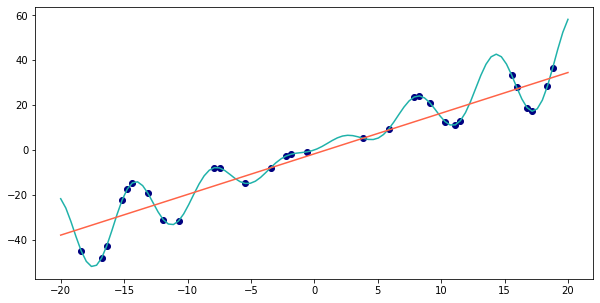

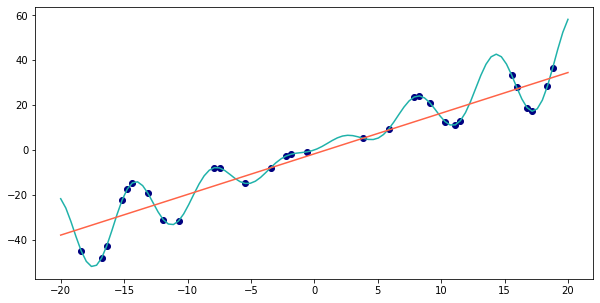

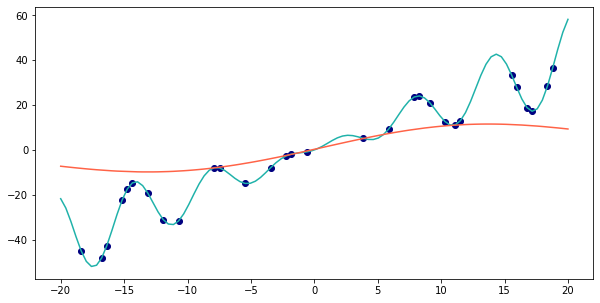

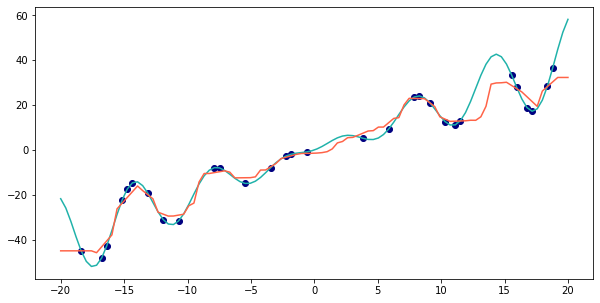

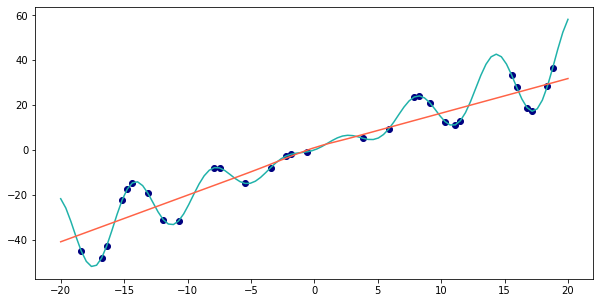

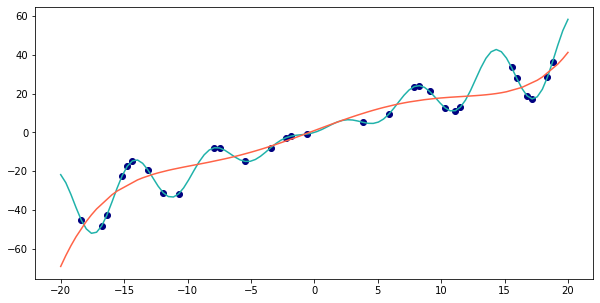

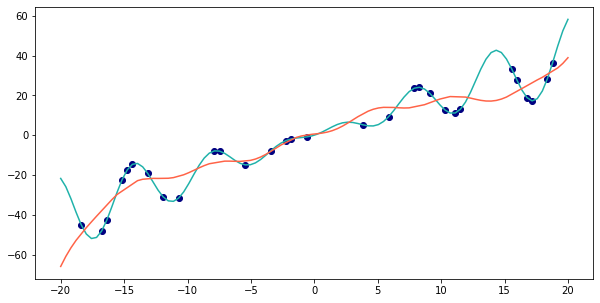

In [8]:
t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

models = [
    LinearRegression(), 
    Ridge(),
    SVR(),
    RandomForestRegressor(n_estimators=1000),
    MLPRegressor(hidden_layer_sizes=(100,100), random_state=42),
    make_pipeline(
        make_column_transformer(
            (PolynomialFeatures(degree=5),[0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin),[0]),
            (PolynomialFeatures(degree=5),[0])
        ),
        LinearRegression()
    )
]
model_names = ['LinearRegression', 'Ridge', 'SVR', 'RandomForestRegressor', 'MLPRegressor', 'PolynomialRegression_simple', 'PolynomialRegression_sin']

for model, name in zip(models, model_names):
    mse, r2 = evaluate_model(X, f1, model, random_state=39)
    t.add_row([name, mse, r2])

print(t)

Test di LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR_model = LinearRegression(n_jobs=-2)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1),f1(X.reshape(-1,1)),train_size=0.3,random_state=42,shuffle=True)

LR_model.fit(X_train,y_train)

print(mean_squared_error(y_true=y_test,y_pred=LR_model.predict(X_test)))
print(r2_score(y_true=y_test,y_pred=LR_model.predict(X_test)))

65.72227592689515
0.8950661957810067


Test di MLPRegressor e GridSearchCV

In [10]:
from sklearn.model_selection import ParameterGrid, GridSearchCV


parameters ={
    'hidden_layer_sizes' : [(200,200),(100,100)],
    'solver' : ['lbfgs','sgd','adam']
}

X_train, X_test, y_train, y_test = generate_train_test(X, f1)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.ravel()
y_test = y_test.ravel()

gscv1 = GridSearchCV(
    estimator=MLPRegressor(max_iter=1000), 
    param_grid=parameters, 
    scoring='neg_mean_squared_error',
    n_jobs=-2
)

gscv1.fit(X_train,y_train)

y_pred = gscv1.predict(X_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

65.37943656988962
0.8916446794722946


In [11]:
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures

X_train, X_test, y_train, y_test = generate_train_test(X, f1, random_state=40)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.ravel()
y_test = y_test.reshape(-1,1)

# Metodo manuale, senza usare la pipeline
# ft = FunctionTransformer(np.sin)
# X_train_mod = ft.fit_transform(X_train)
# X_test_mod = ft.fit_transform(X_test)

pf = PolynomialFeatures(degree=3)

X_train_mod = pf.fit_transform(X_train) #notare che in questo caso devono essere trasformati esplicitamente sia X_train che X_test
X_test_mod = pf.fit_transform(X_test)

LR_model = LinearRegression()

LR_model.fit(X_train_mod,y_train)
y_pred = LR_model.predict(X_test_mod)

print(f'Metodo manuale: r2_score={r2_score(y_test,y_pred)}')

# Utilizzo della pipeline, riproducendo quando fatto sopra
pipeline1 = make_pipeline(
    make_column_transformer(
        # (FunctionTransformer(np.sin), [0]),
        (PolynomialFeatures(degree=3), [0])
    ),
    LinearRegression()
)

pipeline1.fit(X_train,y_train)
y_pred = pipeline1.predict(X_test)
print(f'Utilizzo della pipeline: r2_score={r2_score(y_test,y_pred)}')

Metodo manuale: r2_score=0.8470961110012888
Utilizzo della pipeline: r2_score=0.8470961110012888
